# BBC news Classification Model 
Done by : Samah Malibari, Master sturdent @CardiffUniversity

Email: MalibariS@cardiff.ac.uk

The aim of the model is to classify a BBC article into its category which is one of the 5 categories (business, entertainment, politics, sport, tech). The given input were a BBC folder which consists of 2225 documents from the BBC news website corresponding to stories in five topical areas from 2004-2005. The following steps were done to build the required model:


1.   Accessing the Data
2.   Preprocessing the Data
3.   Features Extraction
4.   Features Selection
5.   Split the Dataset 
6.   Training the Models
7.   Model Selection
8.   Testing the Model



In [ ]:
#First we need to import some libraries 
import numpy as np
import nltk
import sklearn
import pandas as pd
import os #to navigate through the directory 

# 1. Accessing the Data

  A. You need to upload the BBC folder in Google Drive 
  
  B. Navigate through the folder in Google colab and copy the BBC folder path and paste it in the 'bbc_path' in the following code.
  
  C. Grante the access of Google Drive to let Google colab reach to the folder 

In [ ]:
#Grant the access for Google Drive 
from google.colab import drive
drive.mount('/content/drive/')

#Change the path here to be the path of the bbc folder in your Google Drive 
bbc_path = '/content/drive/MyDrive/Colab Notebooks/Applications for ML/bbc'
#Define the folders names of the categories inside the bbc folder 
categories = ["business","entertainment","politics","sport","tech"]

#To navigate through each folder and save its contents into a list 
articles_list = [] 
category_list = []
for category in categories:
  category_path = bbc_path+'/'+ category +'/'
  files = os.listdir(category_path) #Add the name of the category in the path to open thihs folder 
  for text in files: #navigate through each text file in the category folder 
        text_path = category_path + "/" + text #Add the name of the text file to the path 
        with open(text_path, errors = 'replace') as t: #Open the text file 
            data = t.readlines() #read the data of the text file 
        data = ' '.join(data) #All the text data will be joined as a string 
        articles_list.append(data) #Add the text file data into the list (x)
        category_list.append(category) #Add the lable (category) of the data into the list (y)

#print to check the saved data     
print(str("-----------------------------------------------------"))
print(str("The first article: "+articles_list[0]))
print(str("The category of the first article: "+category_list[0]))


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
-----------------------------------------------------
The first article: Weak dollar trims Cadbury profits
 
 The world's biggest confectionery firm, Cadbury Schweppes, has reported a modest rise in profits after the weak dollar took a bite out of its results.
 
 Underlying pre-tax profits rose 1% to £933m ($1.78bn) in 2004, but would have been 8% higher if currency movements were stripped out. The owner of brands such as Dairy Milk, Dr Pepper and Snapple generates more than 80% of its sales outside the UK. Cadbury said it was confident it would hit its targets for 2005. "While the external commercial environment remains competitive, we are confident that we have the strategy, brands and people to deliver within our goal ranges in 2005," said chief executive Todd Stitzer.
 
 The modest profit rise had been expected by analysts after the company said in Dece

# 2. Preprocessing Data

Change the lists of articals and categories into DataFrame, dealing with DataFrames is a profitional way to represent the data and manupilate them. 

In [ ]:
#Create a CSV file from our lists 
bbc_csv = {'articles':articles_list, 'categories':category_list}
#Create a dataframe from the cvs file using Pandas library 
df = pd.DataFrame(bbc_csv)
#Create thhe columns for the DataFrame
columns_list = ['article', 'category']
df.columns = columns_list
#To see the DataFrame
df

,article,category
0,Weak dollar trims Cadbury profits\n \n The wor...,business
1,Iran budget seeks state sell-offs\n \n Iran's ...,business
2,BA to suspend two Saudi services\n \n British ...,business
3,Business fears over sluggish EU economy\n \n A...,business
4,Russia gets investment blessing\n \n Soaring o...,business
...,...,...
2220,Apple sues to stop product leaks\n \n Computer...,tech
2221,Apple laptop is 'greatest gadget'\n \n The App...,tech
2222,More power to the people says HP\n \n The digi...,tech
2223,Peer-to-peer nets 'here to stay'\n \n Peer-to-...,tech


In [ ]:
#Transform each category to a numaricl label 
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder()
df['label'] = label_encoder.fit_transform(df['category'])
dataframe = df[['article', 'category', 'label']]
dataframe

,article,category,label
0,Weak dollar trims Cadbury profits\n \n The wor...,business,0
1,Iran budget seeks state sell-offs\n \n Iran's ...,business,0
2,BA to suspend two Saudi services\n \n British ...,business,0
3,Business fears over sluggish EU economy\n \n A...,business,0
4,Russia gets investment blessing\n \n Soaring o...,business,0
...,...,...,...
2220,Apple sues to stop product leaks\n \n Computer...,tech,4
2221,Apple laptop is 'greatest gadget'\n \n The App...,tech,4
2222,More power to the people says HP\n \n The digi...,tech,4
2223,Peer-to-peer nets 'here to stay'\n \n Peer-to-...,tech,4


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


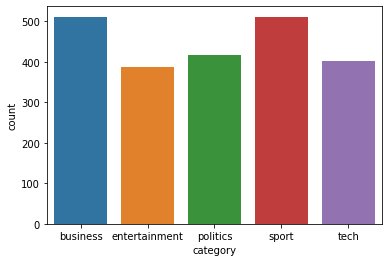

In [ ]:
#Countplot the Categories to illustrate the numbers of articles in each category 
import seaborn as sns
sns.countplot(df.category)

In [ ]:
#Check for null data and remove it if exist
df.isnull().any()

article     False
category    False
label       False
dtype: bool

**Create a cleaning function to do the following:**

  1- Tokenize the artcials (Change sentences into words)

  2- Change words to lowercase 

  3- Remove uneccessary spaces and new lines

  4- Remove the stopwords 

  5- Remove the non-words 

  6- Get the Lemma of each word (Back to Dictionary form)
  

In [ ]:
#import the nltk library which helps in processing the texts
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re

#Create the cleaning fuction 
def clean_data(text):
    #Change text to lower case and replcae the caracters \n and \r to space and null respectivly + remove any numbers
    text = text.lower().replace('\n',' ').replace('\r','').replace('\d+', '').strip()
    #Remove extra spaces to 1 space 
    text = re.sub(' +',' ',text)
    #Remove non-words 
    text = re.sub('[^\w\s]','', text)
    #Create the list of English stopwords 
    stopwords_list = set(stopwords.words('english'))
    # Add more words to the stopword list, like punctuation marks
    stopwords_list.add(".")
    stopwords_list.add(",")
    stopwords_list.add("--")
    stopwords_list.add("``")
    #Tokenize the word and get its lemma
    tokens_list = word_tokenize(text)
    #init the lemmatizer 
    lemmatizer = nltk.stem.WordNetLemmatizer()
    #Get the Lemma of each word
    lemma_tokens_list = [lemmatizer.lemmatize(word) for word in tokens_list]
    #Add only the words that it is not one of the stopwords 
    clean_sentence = [word for word in lemma_tokens_list if not word in stopwords_list]
    #Connect the list of words into a single sentence 
    text = ' '.join(clean_sentence)

    return text


In [ ]:
#Create a new column in the DataFrame df with the Cleaned data
#Using .apply() is better than the loop and take less time so always use it with DataFrames.. 
df['words'] = df['article'].apply(clean_data)
# removing number from strings of a specific column
df['words'] = df['words'].str.replace('\d+', '')
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  """


,article,category,label,words
0,Weak dollar trims Cadbury profits\n \n The wor...,business,0,weak dollar trim cadbury profit world biggest ...
1,Iran budget seeks state sell-offs\n \n Iran's ...,business,0,iran budget seek state selloff iran president ...
2,BA to suspend two Saudi services\n \n British ...,business,0,ba suspend two saudi service british airway ha...
3,Business fears over sluggish EU economy\n \n A...,business,0,business fear sluggish eu economy european lea...
4,Russia gets investment blessing\n \n Soaring o...,business,0,russia get investment blessing soaring oil sal...
...,...,...,...,...
2220,Apple sues to stop product leaks\n \n Computer...,tech,4,apple sue stop product leak computer firm appl...
2221,Apple laptop is 'greatest gadget'\n \n The App...,tech,4,apple laptop greatest gadget apple powerbook ...
2222,More power to the people says HP\n \n The digi...,tech,4,power people say hp digital revolution focused...
2223,Peer-to-peer nets 'here to stay'\n \n Peer-to-...,tech,4,peertopeer net stay peertopeer pp network stay...


# 3. Features Extraction

**There are 3 Features extracted from the articals:** 
1. Words Freaqancy 
   
2. n-gram 

3. Tif-if

In [ ]:
#To viuialize the words freacuancy in the articals we use 'Word coulds' 
#So we can expect the freaquant words in each class 
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def create_words_cloud(words):
  wordscould = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(words)
  plt.figure(figsize=(10,7))
  plt.imshow(wordscould, interpolation="bilinear")
  plt.axis('off')
  plt.show()

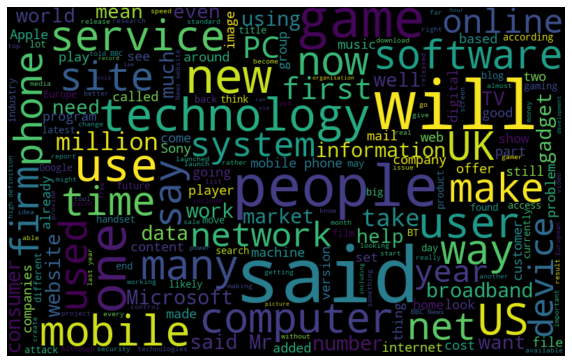

In [ ]:
#Call the function and pass only the Tech articals
subset = df[df.category=="tech"]
text = subset.article.values
words = ' '.join(text) #chsnge the list of sentences into a single string 
create_words_cloud(words)

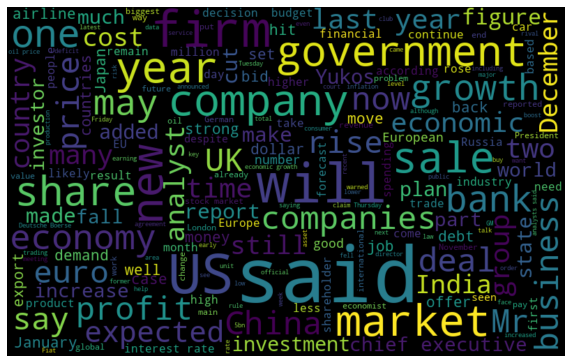

In [ ]:
#Illustraite the frequency Business words 
subset = df[df.category=="business"]
text = subset.article.values
words = ' '.join(text)
create_words_cloud(words)

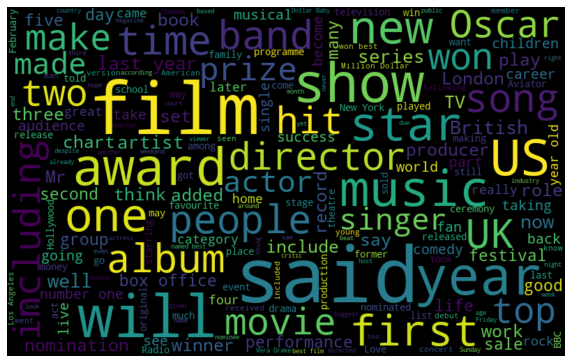

In [ ]:
#Illustraite the frequency entertainment words 
subset = df[df.category=="entertainment"]
text = subset.article.values
words = ' '.join(text)
create_words_cloud(words)

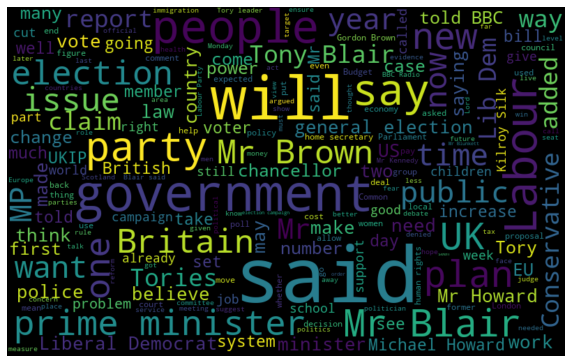

In [ ]:
#Illustraite the frequency politics words 
subset = df[df.category=="politics"]
text = subset.article.values
words = ' '.join(text)
create_words_cloud(words)

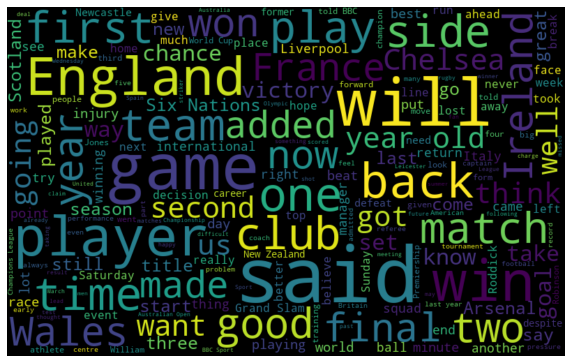

In [ ]:
#Illustraite the frequency sport words 
subset = df[df.category=="sport"]
text = subset.article.values
words = ' '.join(text)
create_words_cloud(words)

In [ ]:
#Count the 1000 most "Frequency of Words" and create a nother columns in DF with it 
frequent_words= pd.Series(' '.join(df.words).split()).value_counts()[:1000]

#Save the updated list of frequent_words after removing the least frequent_words from them   
df['frequent_words'] = df['words'].apply(lambda x: ' '.join([word for word in x.split() if word in (frequent_words)]))

#Check how the data transformed
print("df.words[0]: \n"+df.words[0])
print("--------")
print("df.frequent_words[0]: \n"+df.frequent_words[0])


df.words[0]: 
weak dollar trim cadbury profit world biggest confectionery firm cadbury schweppes ha reported modest rise profit weak dollar took bite result underlying pretax profit rose  m bn  would  higher currency movement stripped owner brand dairy milk dr pepper snapple generates  sale outside uk cadbury said wa confident would hit target  external commercial environment remains competitive confident strategy brand people deliver within goal range  said chief executive todd stitzer modest profit rise expected analyst company said december poor summer weather hit soft drink sale europe cadbury said underlying sale   growth wa helped confectionery brand including cadbury trident hall enjoyed successful year likeforlike sale  drink sale  strong growth u carbonated soft drink led dr pepper diet drink offset weaker sale europe cadbury added fuel growth costcutting programme saved m  bringing total cost saving m since scheme began mid programme set close  group factory shed  workforce c

In [ ]:
#For n-gram feeature, the bi-gram and tri-gram 
#bigrams_series = (pd.Series(nltk.ngrams(' '.join(df.frequent_words).split(), 2)).value_counts())
#trigrams_series = (pd.Series(nltk.ngrams(df.frequent_words, 3)).value_counts())


**Split the Data set**

**The full dataset splitted into 3 datasets:**
1. Training set 90%
2. Development set 10%
3. Testing set 10%

**Note:** we need to split the sets from now to use the sets into further fuctions 

In [ ]:
#To split the Dataset into Train, Development, and Test sets we split them through 2 phases
from sklearn.model_selection import train_test_split

#Split first the full dataset into Training (90%) and Testing (10%)
X_train, X_test, Y_train, Y_test = train_test_split(df['frequent_words'], df['label'], test_size=0.1, random_state=42)

#Split the training data (90%) again into Training (80%) and Development(10%) sets
X_train, X_dev, Y_train, Y_dev = train_test_split(X_train, Y_train, test_size=0.11, random_state=42) # 0.11 x 0.9 = 0.1


In [ ]:
#Print the data numbers to check 
print("X_train: "+str(X_train.shape))
print("X_dev: "+str(X_dev.shape))
print("X_test: "+str(X_test.shape))

X_train: (1781,)
X_dev: (221,)
X_test: (223,)


In [ ]:
#Trnsform the frequent_words into features using "tf_idf"
from sklearn.feature_extraction.text import TfidfVectorizer
#We use here the range of n-gram we want as a features (uni-gram and bi-gram) 
tf_idf = TfidfVectorizer(sublinear_tf=True, min_df=10, norm='l2', encoding='utf-8', ngram_range=(1, 2)) 
#Note: we could change the previous parameter and add some e.g. max_features=500 

#For Training set .. 
X_train_features = tf_idf.fit_transform(X_train).toarray()
Y_train_labels = Y_train
print ("Size new X_train_features matrix: "+str(X_train_features.shape))
print ("Size new Y_train_labels: "+str(Y_train_labels.shape))

#For Development set .. 
X_dev_features = tf_idf.transform(X_dev).toarray()
Y_dev_labels = Y_dev
print ("Size new X_dev_features matrix: "+str(X_dev_features.shape))
print ("Size new Y_dev_labels: "+str(Y_dev_labels.shape))

#For Testing set .. 
X_test_features = tf_idf.transform(X_test).toarray()
Y_test_labels = Y_test
print ("Size new X_test_features matrix: "+str(X_test_features.shape))
print ("Size new Y_test_labels: "+str(Y_test_labels.shape))


Size new X_train_features matrix: (1781, 2553)
Size new Y_train_labels: (1781,)
Size new X_dev_features matrix: (221, 2553)
Size new Y_dev_labels: (221,)
Size new X_test_features matrix: (223, 2553)
Size new Y_test_labels: (223,)


# Features Selection

I have tried to reduce the number of **[k=500, 700, 1000, 2000, 2553]**. However, the best result was to remain the original number of features as it is from the tf_idf which is 2553 to achive the best accuracy. 

In [ ]:
#Using Chi2 and SelectKBest to reducae the number of features we have 
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

#For Training 
fs_sentanalysis1=SelectKBest(chi2, k=2553).fit(X_train_features, Y_train_labels)
X_chi2_train_features = fs_sentanalysis1.transform(X_train_features)
print ("Size original training matrix: "+str(X_train_features.shape))
print ("Size new training matrix: "+str(X_chi2_train_features.shape))

#For Development 
fs_sentanalysis2=SelectKBest(chi2, k=2553).fit(X_dev_features, Y_dev_labels)
X_chi2_dev_features = fs_sentanalysis2.transform(X_dev_features)
print ("Size original development matrix: "+str(X_dev_features.shape))
print ("Size new development matrix: "+str(X_chi2_dev_features.shape))

#For Testing 
fs_sentanalysis3=SelectKBest(chi2, k=2553).fit(X_test_features, Y_test_labels)
X_chi2_test_features = fs_sentanalysis3.transform(X_test_features)
print ("Size original training matrix: "+str(X_test_features.shape))
print ("Size new training matrix: "+str(X_chi2_test_features.shape))



Size original training matrix: (1781, 2553)
Size new training matrix: (1781, 2553)
Size original development matrix: (221, 2553)
Size new development matrix: (221, 2553)
Size original training matrix: (223, 2553)
Size new training matrix: (223, 2553)


# Train the Models

For the sake of experiment, I will train 4 different classifiers and pick the best one besed on the accuracy. 

**The choosen classifiers are:** 
1. Support Vector Machine (SVM)
2. Random Forest (RF)
3. Logistic Regression (LR)
4. Decision Tree (DT)

In [ ]:
#init the Support Vector Machine (SVM) classifier
svm_clf_sentanalysis=sklearn.svm.SVC(kernel="linear",gamma='auto')

# Train the SVM model. This may also take a while.
svm_clf_sentanalysis.fit(X_chi2_train_features,Y_train_labels) 

SVC(gamma='auto', kernel='linear')

In [ ]:
#init the Random Forest (RF) classifier
from sklearn.ensemble import RandomForestClassifier
rnd_clf_sentanalysis = RandomForestClassifier(n_estimators=100, random_state=42)
#train the model
rnd_clf_sentanalysis.fit(X_chi2_train_features,Y_train_labels)

RandomForestClassifier(random_state=42)

In [ ]:
#init the Logistic Regression (LR) classifier
from sklearn.linear_model import LogisticRegression
log_reg_sentanalysis = LogisticRegression(solver="liblinear", C=10**10, random_state=42)
#train the model
log_reg_sentanalysis.fit(X_chi2_train_features,Y_train_labels)

LogisticRegression(C=10000000000, random_state=42, solver='liblinear')

In [ ]:
#init the Decision Tree (DT) classifier
from sklearn.tree import DecisionTreeClassifier
tree_clf_sentanalysis = DecisionTreeClassifier(random_state=42)
#train the model 
tree_clf_sentanalysis.fit(X_chi2_train_features,Y_train_labels)

DecisionTreeClassifier(random_state=42)

# Model Selection

**Test the model on The Development set**

I have conducted some experments on the development set which is examining each trained classifier on it, and the one that got the highest accuracy will be the choosen model to test it on the test data

In [ ]:
#The prediction for Support Vector Machine (SVM) classifier
Y_dev_SVM_predictions=svm_clf_sentanalysis.predict(X_chi2_dev_features)
from sklearn.metrics import classification_report
print(classification_report(Y_dev_labels, Y_dev_SVM_predictions))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95        50
           1       1.00      0.96      0.98        23
           2       0.92      0.94      0.93        49
           3       1.00      1.00      1.00        62
           4       0.97      1.00      0.99        37

    accuracy                           0.97       221
   macro avg       0.97      0.97      0.97       221
weighted avg       0.97      0.97      0.97       221



In [ ]:
#The prediction for Random Forest (RF) classifier
Y_dev_RF_predictions=rnd_clf_sentanalysis.predict(X_chi2_dev_features)
print(classification_report(Y_dev_labels, Y_dev_RF_predictions))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95        50
           1       0.96      0.96      0.96        23
           2       0.94      0.92      0.93        49
           3       0.97      1.00      0.98        62
           4       0.95      0.95      0.95        37

    accuracy                           0.95       221
   macro avg       0.95      0.95      0.95       221
weighted avg       0.95      0.95      0.95       221



In [ ]:
#The prediction for Logistic Regression (LR) classifier
Y_dev_LR_predictions=log_reg_sentanalysis.predict(X_chi2_dev_features)
print(classification_report(Y_dev_labels, Y_dev_LR_predictions))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97        50
           1       0.96      0.96      0.96        23
           2       0.94      0.94      0.94        49
           3       1.00      1.00      1.00        62
           4       0.97      1.00      0.99        37

    accuracy                           0.97       221
   macro avg       0.97      0.97      0.97       221
weighted avg       0.97      0.97      0.97       221



In [ ]:
#The prediction for Decision Tree (DT) classifier
Y_dev_DT_predictions=tree_clf_sentanalysis.predict(X_chi2_dev_features)
print(classification_report(Y_dev_labels, Y_dev_DT_predictions))

              precision    recall  f1-score   support

           0       0.81      0.86      0.83        50
           1       0.73      0.70      0.71        23
           2       0.91      0.86      0.88        49
           3       0.91      0.95      0.93        62
           4       0.80      0.76      0.78        37

    accuracy                           0.85       221
   macro avg       0.83      0.82      0.83       221
weighted avg       0.85      0.85      0.85       221



# Test the Model

**Test the model on The Test Set**

The Best models are The **Logistic Regression** and the **Support vector machine** with **accuracy up to 97%** tested on the Dev set. However, I choose the Logistic Regression because it has a higher f1-scores than the SVM. 

So the Logistic Regression classifier will be tested on the Test set and calculate the accuracy. 

In [ ]:
#Test the Logistic Regression using test data
Y_text_predictions=log_reg_sentanalysis.predict(X_chi2_test_features)


In [ ]:
#Print the accuracy for the Logistic Regression 
print(classification_report(Y_test_labels, Y_text_predictions))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97        58
           1       0.98      0.95      0.96        43
           2       0.97      1.00      0.99        36
           3       0.98      1.00      0.99        49
           4       0.97      0.97      0.97        37

    accuracy                           0.98       223
   macro avg       0.98      0.98      0.98       223
weighted avg       0.98      0.98      0.98       223



**Try to test the Classifier using articals from different categories where will be listed as follow:**

First artical will be from **business category**

Second artical will be from **entertainment category**

Third artical will be from **politics category**

Fourth artical will be from **sport category**

Fifth artical will be from **tech category**


In [ ]:
#Picking some articals from the test set 
print(str(X_test))

414     profit china profit computer firm still demand...
420     tsunami hit bank bank face hard time following...
1644    past put fourth round australian open victory ...
416     see world economy u general ha sale profit gre...
1232    police police british national party home sout...
                              ...                        
353     sale hit next next ha said annual profit m low...
2024    mobile network seek boost mobile g network nee...
25      buy u giant ha sold life bn bn sale move away ...
254     economy hit german job number people work euro...
321     m profit maker network ha profit year said mad...
Name: frequent_words, Length: 223, dtype: object


In [ ]:
#Show the Business article
print("The following Article is from ["+df.iloc[353].category+"]")
print(df.iloc[353].article)

The following Article is from [business]
Weak end-of-year sales hit Next
 
 Next has said its annual profit will be £5m lower than previously expected because its end-of-year clearance sale has proved disappointing.
 
 "Clearance rates in our end-of-season sale have been below our expectations," the company said. The High Street retailer said it now expected to report annual profits of between £415m and £425m ($779m-798m). Next's shares fell more than 3% following the release of the trading statement.
 
 Next chief executive Simon Wolfson admitted that festive sales were "below where we would expect a normal Christmas to be", but said sales should still top analyst expectations.
 
 Among areas where Next could have done better, Mr Wolfson said menswear ranges were "a little bit too similar to the previous year". Mr Wolfson also said that disappointing pre-Christmas sales were "more to do with the fact that we went in with too much stock rather than (the fact that) demand wasn't there f

In [ ]:
#Show the entertainment article
print("The following Article is from ["+df.iloc[891].category+"]")
print(df.iloc[891].article)

The following Article is from [entertainment]
Smith loses US box office crown
 
 New comedy Diary of a Mad Black Woman has ended Will Smith's reign at the top of the North American box office.
 
 Based on a play by Tyler Perry, who also stars as a gun-toting grandmother, the film took $22.7m (£11.8m) in its first three days of release. After topping the chart for two consecutive weeks, Smith's romantic comedy Hitch dropped to second place with takings of $21m (£10.9m). Keanu Reeves' supernatural thriller Constantine dropped a place to three. Based on the Hellblazer comics, the film took $11.8m (£6.1m) on its second week of release. Two new entries came next in the chart, with Wes Craven's horror movie Cursed, about a werewolf loose in Los Angeles, in fourth position with $9.5m (£4.9m).
 
 Action comedy Man of the House, starring Tommy Lee Jones as a Texas ranger assigned to protect a cheerleader squad, came in at fifth with $9m (£4.6m). Clint Eastwood's boxing drama Million Dollar Baby

In [ ]:
#Show the politics article
print("The following Article is from ["+df.iloc[1232].category+"]")
print(df.iloc[1232].article)

The following Article is from [politics]
Police probe BNP mosque leaflet
 
 Police are investigating a British National Party leaflet posted to homes in south Wales opposing plans for a new mosque.
 
 Anti-racism campaigners in Swansea have handed copies to South Wales Police. Swansea's Muslim community is raising money to open a new mosque and community centre in the former St Andrews United Reform Church. The building on George Street has been derelict since the 1980s.
 
 Taha Idris, director of the Swansea Bay Race Equality Council, said his organisation contacted police after receiving complaints from the public. "I'm quite shocked to see this sort of leaflet by the BNP in Swansea," he said.
 
 "The BNP has tried in the past to get into Swansea and this is another example of them trying again. "I am in no doubt that the BNP are not needed and not wanted here." A South Wales Police spokeswoman confirmed that they were looking at the contents of the leaflet. According to the BNP's we

In [ ]:
#Show the sport article
print("The following Article is from ["+df.iloc[1644].category+"]")
print(df.iloc[1644].article)

The following Article is from [sport]
Edgy Agassi struggles past Dent
 
 Andre Agassi put in an erratic display before edging into the fourth round of the Australian Open with victory over Taylor Dent.
 
 The 34-year-old American, seeded eighth, made a poor start, dropping serve early on and later needing two chances to serve out the set. Having secured the lead, Agassi still failed to take control as both players forced a succession of breaks. But Agassi won the tie-break before wrapping up a 7-5 7-6 (7-3) 6-1 win. Fourth seed
 
 survived an injury scare as he battled past Mario Ancic 6-4 3-6 6-3 6-4. The Russian turned his right ankle in the third game of the fourth set and called for treatment immediately. But he showed no sign of the problem when he returned to the court to wrap up victory in two hours 45 minutes.
 
 Ancic, Wimbledon semi-finalist in 2004, looked set to push Safin all the way when he took the second set but Safin raised his game to sink the Croatian. Safin said he 

In [ ]:
#Show the Tech article
print("The following Article is from ["+df.iloc[2024].category+"]")
print(df.iloc[2024].article)

The following Article is from [tech]
Mobile networks seek turbo boost
 
 Third-generation mobile (3G) networks need to get faster if they are to deliver fast internet surfing on the move and exciting new services.
 
 That was one of the messages from the mobile industry at the 3GSM World Congress in Cannes last week. Fast 3G networks are here but the focus has shifted to their evolution into a higher bandwidth service, says the Global Mobile Suppliers Association. At 3GSM, Siemens showed off a system that transmits faster mobile data. The German company said data could be transmitted at one gigabit a second - up to 20 times faster than current 3G networks. The system is not available commercially yet, but Motorola, the US mobile handset and infrastructure maker, held a clinic for mobile operators on HSDPA (High Speed Downlink Packet Access), a high-speed, high bandwidth technology available now. Early HSDPA systems typically offer around two megabits per second (Mbps) compared with les

In [ ]:
#The categories are listed as follows 
#categories = ["business","entertainment","politics","sport","tech"]
texts = [df.iloc[353].article,
         df.iloc[891].article,
         df.iloc[1232].article,
         df.iloc[1644].article,
         df.iloc[2024].article]

predictions=log_reg_sentanalysis.predict(tf_idf.transform(texts).toarray())
n = 0
for predicted in predictions:
    n = n+1
    if (n==1):
       print(n,"- First Article is '{}'".format(df.iloc[353].category))
       print("    And Predicted as: '{}'".format(categories[predicted]))
    if(n==2):
       print(n,"- Second Article is '{}'".format(df.iloc[891].category))
       print("    And Predicted as: '{}'".format(categories[predicted]))
    if(n==3):
       print(n,"- Third Article is '{}'".format(df.iloc[1232].category))
       print("    And Predicted as: '{}'".format(categories[predicted]))
    if(n==4):
       print(n,"- Fourth Article is '{}'".format(df.iloc[1644].category))
       print("    And Predicted as: '{}'".format(categories[predicted]))
    if(n==5):
       print(n,"- Fifth Article is '{}'".format(df.iloc[2024].category))
       print("    And Predicted as: '{}'".format(categories[predicted]))


1 - First Article is 'business'
    And Predicted as: 'business'
2 - Second Article is 'entertainment'
    And Predicted as: 'entertainment'
3 - Third Article is 'politics'
    And Predicted as: 'politics'
4 - Fourth Article is 'sport'
    And Predicted as: 'sport'
5 - Fifth Article is 'tech'
    And Predicted as: 'tech'
